# Demo for using pydmp for data fetching and analysis

<h4 style="color:orange;">Pydmp is a python wrapper of the DMP APIs, providing support for reading data in various ways.</h4>

To do:
- Everything should be a function
- There should be a data preprocessing pipeline
- to remove outliers about 2.5
- Also some missing latitude and longitude really

<h2 style="color:#0074D9;">1. List available datasets.</h2>

In [1]:
from pydmp import state
state()

Connected to 1 studies:
Connected to 1 studies:
You have access to 1 studies:
0b53d635-e3eb-4054-855e-485c5268b7c6 = AI-RESPIRE


<h4 style="color:orange;">Pydmp for now supports two granularities to read the data:</h4>
<h4 style="color:orange;">&nbsp;&nbsp;&nbsp;&nbsp;a. Reading a whole file each time.</h4>
<h4 style="color:orange;">&nbsp;&nbsp;&nbsp;&nbsp;b. Reading individual data clips (a value of a cell in the csv or xlsx sheet).</h4>
<h4 style="color:orange;">Other granularities can be further developed depending on real user cases.</h4>


<h2 style="color:#0074D9;">2. List available files of a study.</h2>

In [2]:
from pydmp import list_files
study_id = '0b53d635-e3eb-4054-855e-485c5268b7c6'
files = list_files(study_id=study_id, format='df') # list
files

,file_id,study_id,file_name,file_size,file_created_at
0,4f3dceec-67a2-44a4-acab-cf7361b7ce83,0b53d635-e3eb-4054-855e-485c5268b7c6,AI Respire Peakflow df.xlsx,18081,2025-06-02 20:42:21
1,483666e3-3208-4845-a984-bef044d57d8d,0b53d635-e3eb-4054-855e-485c5268b7c6,airspeck_test_df.xlsx,38876572,2025-06-02 20:42:40
2,0e141dd0-e7b8-4b28-a669-953f7540738b,0b53d635-e3eb-4054-855e-485c5268b7c6,filtered_airspeck_df.xlsx,68161645,2025-06-02 20:42:57
3,8deaf6b2-3bb8-46f7-80e8-1ec4250e618b,0b53d635-e3eb-4054-855e-485c5268b7c6,filtered_respeck_df.xlsx,574335,2025-06-02 20:43:03
4,edd5a16d-f1b9-4766-b3b6-dfd9e4d01702,0b53d635-e3eb-4054-855e-485c5268b7c6,Inhale outcomes Filtered.xlsx,10848,2025-06-02 20:43:09
5,aa994b44-8ebb-45eb-807e-cbeff23aa328,0b53d635-e3eb-4054-855e-485c5268b7c6,resp_min_test.xlsx,11921068,2025-06-02 20:43:17
6,0f4ec407-f391-4808-84e4-1cef92892263,0b53d635-e3eb-4054-855e-485c5268b7c6,resp_min_train.xlsx,21125628,2025-06-02 20:43:26
7,caf12f6b-7fbe-4fe3-ae13-23ff92518e2b,0b53d635-e3eb-4054-855e-485c5268b7c6,test_respeck_hrly.xlsx,268170,2025-06-02 20:43:33
8,69333d9b-6785-4b7c-8efe-908a1b9c7c14,0b53d635-e3eb-4054-855e-485c5268b7c6,pm_data.csv,115145260,2025-06-02 20:44:03
9,f6581c2b-f6d3-46fe-b1e5-e3de5f1a71ea,0b53d635-e3eb-4054-855e-485c5268b7c6,resp_data.csv,179189958,2025-06-02 20:44:39


<h2 style="color:#0074D9;">3. Fetch the content of a file (csv, xlsx).</h2>

In [3]:
from pydmp import read_file
content = read_file(file=files.iloc[0])
content.head(2)

,Unnamed: 0,subject,season,peak_pred,day,peak_am,peak_pm
0,756,INH101,Winter,553,1,,
1,757,INH101,Summer,553,1,,


In [4]:
import pandas as pd
respiratory_data = read_file(file=files.iloc[9])
pollution_data = read_file(file=files.iloc[8])

# DATASETS PIPELINE CLEANING

In [5]:
import pandas as pd
# Ensure timestamp is datetime
respiratory_data['timestamp'] = pd.to_datetime(respiratory_data['timestamp'])
pollution_data['timestamp'] = pd.to_datetime(pollution_data['timestamp'])

# Check for duplicate keys
dupes = respiratory_data[respiratory_data.duplicated(subset=['timestamp', 'patient_id'], keep=False)]
dupes.sort_values(['patient_id', 'timestamp'])

dupes
## The below are the duplicated data!!!!

,Unnamed: 0,patient_id,age,sex,timestamp,season,br_avg,br_std,act_level,step_count,activity
135576,135576,INH005,24,Female,2021-09-08 10:19:00,Summer,NaN,NaN,NaN,0,Sitting straight/Standing
135577,135577,INH005,24,Female,2021-09-08 10:19:00,Summer,NaN,NaN,0.574964,99,Walking
135578,135578,INH005,24,Female,2021-09-08 10:20:00,Summer,NaN,NaN,NaN,0,Lying down on back
135579,135579,INH005,24,Female,2021-09-08 10:20:00,Summer,NaN,NaN,0.446295,89,Walking
362260,362260,INH016,36,Male,2022-07-22 10:47:00,Winter,NaN,NaN,NaN,0,Sitting straight/Standing
...,...,...,...,...,...,...,...,...,...,...,...
1101584,1101584,INH120,32,Female,2022-10-30 01:55:00,Winter,16.495375,0.974599,0.007433,0,Lying down on back
1101585,1101585,INH120,32,Female,2022-10-30 01:56:00,Winter,16.194965,1.376960,0.007354,0,Lying down on back
1101586,1101586,INH120,32,Female,2022-10-30 01:57:00,Winter,16.170277,1.288225,0.007850,0,Lying down on back
1101587,1101587,INH120,32,Female,2022-10-30 01:58:00,Winter,16.185457,2.288017,0.008530,0,Lying down on back


In [6]:
## let's drop duplicates for now
respiratory_data_nd = respiratory_data.drop_duplicates()
pollution_data_nd = pollution_data.drop_duplicates() 
respiratory_data_nd

,Unnamed: 0,patient_id,age,sex,timestamp,season,br_avg,br_std,act_level,step_count,activity
0,0,INH001,65,Female,2021-02-23 00:00:00,Winter,NaN,NaN,0.006813,0,Lying down on back
1,1,INH001,65,Female,2021-02-23 00:01:00,Winter,NaN,NaN,0.006693,0,Lying down on back
2,2,INH001,65,Female,2021-02-23 00:02:00,Winter,NaN,NaN,0.006611,0,Lying down on back
3,3,INH001,65,Female,2021-02-23 00:03:00,Winter,NaN,NaN,0.007045,0,Lying down on back
4,4,INH001,65,Female,2021-02-23 00:04:00,Winter,NaN,NaN,0.006771,0,Lying down on back
...,...,...,...,...,...,...,...,...,...,...,...
1484148,1484148,INH139,47,Female,2023-10-10 23:56:00,Summer,15.966440,2.462694,0.006281,0,Lying down on front
1484149,1484149,INH139,47,Female,2023-10-10 23:57:00,Summer,15.429062,1.772801,0.009020,0,Lying down on front
1484150,1484150,INH139,47,Female,2023-10-10 23:58:00,Summer,15.446239,1.067086,0.006772,0,Lying down on front
1484151,1484151,INH139,47,Female,2023-10-10 23:59:00,Summer,16.658262,1.610748,0.006379,0,Lying down on front


In [7]:
## Check how many NaNs per patient_id
# Percentage of NaNs per column, grouped by patient_id
nan_percent_per_column_per_patient = (
    respiratory_data_nd
    .groupby('patient_id')
    .apply(lambda df: df.isna().sum() / len(df) * 100)
)
# round for readability
nan_percent_per_column_per_patient = nan_percent_per_column_per_patient.round(2)

nan_percent_per_column_per_patient

,Unnamed: 0,patient_id,age,sex,timestamp,season,br_avg,br_std,act_level,step_count,activity
patient_id,,,,,,,,,,,
INH001,0.0,0.0,0.0,0.0,0.0,0.0,30.03,30.03,0.03,0.0,0.0
INH002,0.0,0.0,0.0,0.0,0.0,0.0,29.61,29.61,0.06,0.0,0.0
INH003,0.0,0.0,0.0,0.0,0.0,0.0,22.09,22.09,0.08,0.0,0.0
INH004,0.0,0.0,0.0,0.0,0.0,0.0,28.80,28.80,0.10,0.0,0.0
INH005,0.0,0.0,0.0,0.0,0.0,0.0,35.29,35.29,0.09,0.0,0.0
INH006,0.0,0.0,0.0,0.0,0.0,0.0,26.60,26.60,0.05,0.0,0.0
INH007,0.0,0.0,0.0,0.0,0.0,0.0,17.12,17.12,0.01,0.0,0.0
INH008,0.0,0.0,0.0,0.0,0.0,0.0,34.30,34.30,0.03,0.0,0.0
INH010,0.0,0.0,0.0,0.0,0.0,0.0,29.33,29.33,0.04,0.0,0.0


In [8]:
## Check how many NaNs per patient_id
# Percentage of NaNs per column, grouped by patient_id
nan_percent_per_column_pollution = (
    pollution_data_nd
    .groupby('patient_id')
    .apply(lambda df: df.isna().sum() / len(df) * 100)
)

nan_percent_per_column_pollution

## No pollution columns need to be dropped!

,Unnamed: 0,patient_id,latitude,longitude,timestamp,season,pm2_5,temperature,humidity
patient_id,,,,,,,,,
INH001,0.0,0.0,3.764418,3.764418,0.0,0.0,0.0,0.0,0.0
INH002,0.0,0.0,0.784645,0.784645,0.0,0.0,0.0,0.0,0.0
INH003,0.0,0.0,2.674917,2.674917,0.0,0.0,0.0,0.0,0.0
INH004,0.0,0.0,1.064090,1.064090,0.0,0.0,0.0,0.0,0.0
INH005,0.0,0.0,9.954441,9.954441,0.0,0.0,0.0,0.0,0.0
INH006,0.0,0.0,3.414167,3.414167,0.0,0.0,0.0,0.0,0.0
INH007,0.0,0.0,1.008208,1.008208,0.0,0.0,0.0,0.0,0.0
INH008,0.0,0.0,66.990035,66.990035,0.0,0.0,0.0,0.0,0.0
INH010,0.0,0.0,7.125346,7.125346,0.0,0.0,0.0,0.0,0.0


In [9]:
## For now I am gonna go safe and drop duplicates as well as dropna and then I can discuss:
patient_exlcuded = ["INH016", "INH019","INH026", "INH126", "INH136"]	
resp_data_clean = respiratory_data_nd[~respiratory_data_nd["patient_id"].isin(patient_exlcuded)]
resp_data_clean

,Unnamed: 0,patient_id,age,sex,timestamp,season,br_avg,br_std,act_level,step_count,activity
0,0,INH001,65,Female,2021-02-23 00:00:00,Winter,NaN,NaN,0.006813,0,Lying down on back
1,1,INH001,65,Female,2021-02-23 00:01:00,Winter,NaN,NaN,0.006693,0,Lying down on back
2,2,INH001,65,Female,2021-02-23 00:02:00,Winter,NaN,NaN,0.006611,0,Lying down on back
3,3,INH001,65,Female,2021-02-23 00:03:00,Winter,NaN,NaN,0.007045,0,Lying down on back
4,4,INH001,65,Female,2021-02-23 00:04:00,Winter,NaN,NaN,0.006771,0,Lying down on back
...,...,...,...,...,...,...,...,...,...,...,...
1484148,1484148,INH139,47,Female,2023-10-10 23:56:00,Summer,15.966440,2.462694,0.006281,0,Lying down on front
1484149,1484149,INH139,47,Female,2023-10-10 23:57:00,Summer,15.429062,1.772801,0.009020,0,Lying down on front
1484150,1484150,INH139,47,Female,2023-10-10 23:58:00,Summer,15.446239,1.067086,0.006772,0,Lying down on front
1484151,1484151,INH139,47,Female,2023-10-10 23:59:00,Summer,16.658262,1.610748,0.006379,0,Lying down on front


In [10]:
## also dropping na for the two datasets:
## Respiratory data:
resp_data_clean_na = resp_data_clean.dropna()

## Pollution data:
pollution_data_clean_na = pollution_data_nd.dropna()


## MERGING DATASETS 

In [11]:
## I am going to merge the datasets based on timestamp and patient_id
## if there is no alignment, for now I will discard the data

# Merge the two tables on both patient_id and timestamp
merged_data = pd.merge(
    resp_data_clean_na,
    pollution_data_clean_na,
    on=['patient_id', 'timestamp'],
    how='inner'  # or 'inner' if you only want matching rows
)

## Let's check which ids are in one but not in the other!

id_resp = resp_data_clean_na["patient_id"].unique()
id_pollution = pollution_data_clean_na["patient_id"].unique()

non_matching_id = []

for i in id_resp:
    if i in id_pollution:
        pass
    else: non_matching_id.append(i)

print(non_matching_id, print(len(resp_data_clean_na)), print(len(pollution_data_clean_na)))

1058553
1228132
['INH029'] None None


In [12]:
merged_data.head()

,Unnamed: 0_x,patient_id,age,sex,timestamp,season_x,br_avg,br_std,act_level,step_count,activity,Unnamed: 0_y,latitude,longitude,season_y,pm2_5,temperature,humidity
0,483,INH001,65,Female,2021-02-23 09:22:00,Winter,20.674706,0.233375,0.043933,0,Sitting bent backwards,483,51.490046,-0.174493,Winter,1.65,28.50,32.90
1,484,INH001,65,Female,2021-02-23 09:23:00,Winter,16.519922,1.616556,0.087894,0,Sitting bent backwards,484,51.490047,-0.174500,Winter,1.74,28.65,33.20
2,485,INH001,65,Female,2021-02-23 09:24:00,Winter,15.982914,4.940305,0.095647,0,Sitting bent backwards,485,51.490049,-0.174472,Winter,1.94,28.85,33.05
3,486,INH001,65,Female,2021-02-23 09:25:00,Winter,16.818310,7.513155,0.116090,0,Sitting bent backwards,486,51.490052,-0.174474,Winter,2.00,29.00,32.40
4,487,INH001,65,Female,2021-02-23 09:26:00,Winter,15.047508,4.858142,0.112702,7,Sitting bent backwards,487,51.490128,-0.174413,Winter,2.26,29.10,31.40


In [13]:
import pandas as pd
import numpy as np

def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Autumn'


## Data Preprocessing on merged_data dataframe, following the points:
# 1. Delete non needed columns 
# 2. Classify each patinet as healthy or ashmatic
# 3. Timestamp has to be in datetime format
# 4. Extract time-based features and turn implement 
# cyclical encoding for hour of day and day of week this is because if not the model will see 23pm and 1am as far away 
# 5. drop raw times stamp column

#1 --> Dropping not needed columns
columns_to_delete = ["Unnamed: 0_x", "Unnamed: 0_y", "season_y"]
merge_data_selected_columns = merged_data.drop(columns = columns_to_delete)

#2 --> Classifying each patient as 'ashmatic' or 'healthy' based on ID pattern
merge_data_selected_columns["health"] = np.where(
    merge_data_selected_columns["patient_id"].str[3] == "0", 
    "ashmatic", 
    "healthy"
)

#3 Ensuring 'timestamp' column is in datetime format
merge_data_selected_columns['timestamp'] = pd.to_datetime(merge_data_selected_columns['timestamp'])

# # Extract time-based features
merge_data_selected_columns['is_weekend'] = merge_data_selected_columns['timestamp'].dt.dayofweek.isin([5, 6])
merge_data_selected_columns['month'] = merge_data_selected_columns['timestamp'].dt.month
merge_data_selected_columns['week_of_year'] = merge_data_selected_columns['timestamp'].dt.isocalendar().week

# # Cyclical encoding for hour of day and day of week this is because if not the model will see 23pm and 1am as far away 
merge_data_selected_columns['hour_sin'] = np.sin(2 * np.pi * merge_data_selected_columns['timestamp'].dt.hour / 24)
merge_data_selected_columns['hour_cos'] = np.cos(2 * np.pi * merge_data_selected_columns['timestamp'].dt.hour / 24)

# # Cyclical encoding for day of week
merge_data_selected_columns['dow_sin'] = np.sin(2 * np.pi * merge_data_selected_columns['timestamp'].dt.dayofweek / 7)
merge_data_selected_columns['dow_cos'] = np.cos(2 * np.pi * merge_data_selected_columns['timestamp'].dt.dayofweek / 7)

## Delete the season column and change it into summer and winter in relation to timestamp
merge_data_selected_columns['season'] = merge_data_selected_columns['timestamp'].dt.month.map(get_season)
merge_data_selected_columns.drop(columns=["season_x"])

# this needs to be done but I ll wait cause I need timestamp for now
#clean_inhale_dataset = merge_data_selected_columns.drop(columns=["timestamp"])

merge_data_selected_columns

,patient_id,age,sex,timestamp,season_x,br_avg,br_std,act_level,step_count,activity,...,humidity,health,is_weekend,month,week_of_year,hour_sin,hour_cos,dow_sin,dow_cos,season
0,INH001,65,Female,2021-02-23 09:22:00,Winter,20.674706,0.233375,0.043933,0,Sitting bent backwards,...,32.90,ashmatic,False,2,8,0.707107,-0.707107,0.781831,0.62349,Winter
1,INH001,65,Female,2021-02-23 09:23:00,Winter,16.519922,1.616556,0.087894,0,Sitting bent backwards,...,33.20,ashmatic,False,2,8,0.707107,-0.707107,0.781831,0.62349,Winter
2,INH001,65,Female,2021-02-23 09:24:00,Winter,15.982914,4.940305,0.095647,0,Sitting bent backwards,...,33.05,ashmatic,False,2,8,0.707107,-0.707107,0.781831,0.62349,Winter
3,INH001,65,Female,2021-02-23 09:25:00,Winter,16.818310,7.513155,0.116090,0,Sitting bent backwards,...,32.40,ashmatic,False,2,8,0.707107,-0.707107,0.781831,0.62349,Winter
4,INH001,65,Female,2021-02-23 09:26:00,Winter,15.047508,4.858142,0.112702,7,Sitting bent backwards,...,31.40,ashmatic,False,2,8,0.707107,-0.707107,0.781831,0.62349,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
904433,INH139,47,Female,2023-10-10 23:55:00,Summer,14.581484,0.961288,0.006114,0,Lying down on front,...,43.71,healthy,False,10,41,-0.258819,0.965926,0.781831,0.62349,Autumn
904434,INH139,47,Female,2023-10-10 23:56:00,Summer,15.966440,2.462694,0.006281,0,Lying down on front,...,43.72,healthy,False,10,41,-0.258819,0.965926,0.781831,0.62349,Autumn
904435,INH139,47,Female,2023-10-10 23:57:00,Summer,15.429062,1.772801,0.009020,0,Lying down on front,...,43.74,healthy,False,10,41,-0.258819,0.965926,0.781831,0.62349,Autumn
904436,INH139,47,Female,2023-10-10 23:58:00,Summer,15.446239,1.067086,0.006772,0,Lying down on front,...,43.80,healthy,False,10,41,-0.258819,0.965926,0.781831,0.62349,Autumn


In [14]:
## There are no NAs anymore!
merge_data_selected_columns.isna().sum() / len(merge_data_selected_columns) * 100

patient_id      0.0
age             0.0
sex             0.0
timestamp       0.0
season_x        0.0
br_avg          0.0
br_std          0.0
act_level       0.0
step_count      0.0
activity        0.0
latitude        0.0
longitude       0.0
pm2_5           0.0
temperature     0.0
humidity        0.0
health          0.0
is_weekend      0.0
month           0.0
week_of_year    0.0
hour_sin        0.0
hour_cos        0.0
dow_sin         0.0
dow_cos         0.0
season          0.0
dtype: float64

In [15]:
len(merge_data_selected_columns["patient_id"].unique())

51

In [16]:
merge_data_selected_columns.columns

Index(['patient_id', 'age', 'sex', 'timestamp', 'season_x', 'br_avg', 'br_std',
       'act_level', 'step_count', 'activity', 'latitude', 'longitude', 'pm2_5',
       'temperature', 'humidity', 'health', 'is_weekend', 'month',
       'week_of_year', 'hour_sin', 'hour_cos', 'dow_sin', 'dow_cos', 'season'],
      dtype='object')

In [17]:
merge_data_selected_columns["patient_id"].unique()

array(['INH001', 'INH002', 'INH003', 'INH004', 'INH005', 'INH006',
       'INH007', 'INH008', 'INH010', 'INH011', 'INH012', 'INH013',
       'INH014', 'INH015', 'INH017', 'INH018', 'INH020', 'INH023',
       'INH024', 'INH025', 'INH027', 'INH028', 'INH100', 'INH101',
       'INH102', 'INH103', 'INH106', 'INH107', 'INH108', 'INH109',
       'INH110', 'INH111', 'INH112', 'INH113', 'INH114', 'INH115',
       'INH117', 'INH119', 'INH120', 'INH121', 'INH123', 'INH124',
       'INH127', 'INH128', 'INH129', 'INH130', 'INH131', 'INH132',
       'INH135', 'INH138', 'INH139'], dtype=object)

## OPENWEATHER API REQUEST

In [18]:
# # ## ----------------------------------------------------------
# # ## Create a list of unique timestamp in hour cause openweather is in hour
# # ## patient_id longitude and latitude per user so that I can download equivalent data from OpenWeather
# # ## this is a massive limitation! Only hourly pollution level is not enough
# # ## ----------------------------------------------------------

# ## 
# # import pandas as pd

# pat_choose = ['INH001', 'INH002', 'INH003', 'INH004', 'INH005', 'INH006']

# merge_data_pat_id = merge_data_selected_columns[merge_data_selected_columns["patient_id"].isin(pat_choose)].copy()

# merge_data_pat_id['timestamp_hour'] = pd.to_datetime(merge_data_pat_id['timestamp']).dt.floor('H')

# merge_data_pat_id
# # # # # # # 3. Select only the relevant columns for API querying
# weather_query_cols = ['timestamp_hour', 'latitude', 'longitude']

# # # merge_data_pat_id
# # # # # # # 4. Drop duplicates to minimize API requests
# unique_weather_queries = merge_data_pat_id[weather_query_cols].drop_duplicates()

# # # # # # # 6. Preview
# print(unique_weather_queries)

# # unique_weather_queries.to_csv("request135_139.csv")

## NOW ADDING OPENWEATHER DATA AND MERGING ALTOGETHER

In [19]:
# ----------------------------------------------------------------- 
# Step 1: Import and Concatenate OpenWeather Files
# ----------------------------------------------------------------- 

pollution_results_incremental001_006 = pd.read_csv("pollution_results_incremental001_006.csv")
pollution_results_incremental007_013 = pd.read_csv("pollution_results_incremental007_013.csv")
pollution_results_incremental014_023 = pd.read_csv("pollution_results_incremental014_023.csv") 
pollution_results_incremental024_101 = pd.read_csv("pollution_results_incremental024_101.csv")

# Add more CSVs here if needed

concat_openweather = pd.concat([
    pollution_results_incremental001_006,
    pollution_results_incremental007_013, 
    pollution_results_incremental014_023,
    pollution_results_incremental024_101
])

# Convert and rename timestamp
concat_openweather["start_time"] = pd.to_datetime(concat_openweather["start_time"], unit='s')
concat_openweather["end_time"] = pd.to_datetime(concat_openweather["end_time"], unit='s')
concat_openweather = concat_openweather.rename(columns={"start_time": "timestamp"})

# FLOOR to hour NOW — this is critical
concat_openweather['timestamp_hour'] = concat_openweather['timestamp'].dt.floor('H')

# Round lat/lon
concat_openweather['lat_round'] = concat_openweather['latitude'].round(3)
concat_openweather['lon_round'] = concat_openweather['longitude'].round(3)

# Aggregate on floored hour and rounded location
concat_openweather_agg = (
    concat_openweather
    .groupby(['timestamp_hour', 'lat_round', 'lon_round'])
    .mean(numeric_only=True)
    .reset_index()
)

concat_openweather

,latitude,longitude,timestamp,end_time,AQI,pm2_5,pm10,no,no2,o3,so2,co,timestamp_hour,lat_round,lon_round
0,51.490046,-0.174493,2021-02-23 09:00:00,2021-02-23 10:00:00,1.0,1.72,2.34,0.67,12.85,72.24,4.77,230.31,2021-02-23 09:00:00,51.490,-0.174
1,51.490047,-0.174500,2021-02-23 09:00:00,2021-02-23 10:00:00,1.0,1.72,2.34,0.67,12.85,72.24,4.77,230.31,2021-02-23 09:00:00,51.490,-0.175
2,51.490049,-0.174472,2021-02-23 09:00:00,2021-02-23 10:00:00,1.0,1.72,2.34,0.67,12.85,72.24,4.77,230.31,2021-02-23 09:00:00,51.490,-0.174
3,51.490052,-0.174474,2021-02-23 09:00:00,2021-02-23 10:00:00,1.0,1.72,2.34,0.67,12.85,72.24,4.77,230.31,2021-02-23 09:00:00,51.490,-0.174
4,51.490128,-0.174413,2021-02-23 09:00:00,2021-02-23 10:00:00,1.0,1.72,2.34,0.67,12.85,72.24,4.77,230.31,2021-02-23 09:00:00,51.490,-0.174
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66890,51.478771,-0.189172,2021-08-10 16:00:00,2021-08-10 17:00:00,1.0,2.21,3.10,1.24,7.97,70.10,4.29,223.64,2021-08-10 16:00:00,51.479,-0.189
66891,51.478771,-0.189172,2021-08-10 20:00:00,2021-08-10 21:00:00,1.0,3.25,4.09,0.01,17.31,46.49,4.83,233.65,2021-08-10 20:00:00,51.479,-0.189
66892,51.478771,-0.189172,2021-08-10 21:00:00,2021-08-10 22:00:00,1.0,3.80,4.74,0.01,18.51,39.34,4.65,233.65,2021-08-10 21:00:00,51.479,-0.189
66893,51.478771,-0.189172,2021-08-10 22:00:00,2021-08-10 23:00:00,1.0,4.20,5.24,0.02,19.02,32.90,4.17,230.31,2021-08-10 22:00:00,51.479,-0.189


In [20]:
# ----------------------------------------------------------------- 
# MERGING INHALE WITH OPENWEATHER
# ----------------------------------------------------------------- 

## The problem that I have now is that merge_data_selected_columns is minute level
## while openweather is hourly level
## I will then merge the 2 dataframes on hour for openweather, and hour the minutes belong to 
## for INHALE dataset

print(merge_data_selected_columns["timestamp"].head())  # from pollution data
print(concat_openweather["timestamp"].head())  # from physiological/GPS data 

## Before I merge let's extract the hour
# Floor timestamps to the hour
merge_data_selected_columns['timestamp_hour'] = pd.to_datetime(merge_data_selected_columns['timestamp']).dt.floor('H')


# Prepare INHALE data
merge_data_selected_columns['timestamp_hour'] = pd.to_datetime(merge_data_selected_columns['timestamp']).dt.floor('H')
merge_data_selected_columns['lat_round'] = merge_data_selected_columns['latitude'].round(3)
merge_data_selected_columns['lon_round'] = merge_data_selected_columns['longitude'].round(3)

# Merge
merged_inhale_openweather = pd.merge(
    merge_data_selected_columns,
    concat_openweather_agg,
    on=['timestamp_hour', 'lat_round', 'lon_round'],
    how='inner'
)

diagnostic_merge = pd.merge(
    merge_data_selected_columns,
    concat_openweather_agg,
    on=['timestamp_hour', 'lat_round', 'lon_round'],
    how='outer',
    indicator=True
)
print("Diagnostic merge:", diagnostic_merge['_merge'].value_counts())


# Confirm row reduction
print(f"Merged shape: {merged_inhale_openweather.shape}")
print(f"INHALE base rows: {merge_data_selected_columns.shape}")
print(f"OpenWeather unique hour-loc rows: {concat_openweather_agg.shape}")

0   2021-02-23 09:22:00
1   2021-02-23 09:23:00
2   2021-02-23 09:24:00
3   2021-02-23 09:25:00
4   2021-02-23 09:26:00
Name: timestamp, dtype: datetime64[ns]
0   2021-02-23 09:00:00
1   2021-02-23 09:00:00
2   2021-02-23 09:00:00
3   2021-02-23 09:00:00
4   2021-02-23 09:00:00
Name: timestamp, dtype: datetime64[ns]
Diagnostic merge: _merge
left_only     521411
both          383027
right_only         0
Name: count, dtype: int64
Merged shape: (383027, 36)
INHALE base rows: (904438, 27)
OpenWeather unique hour-loc rows: (27232, 12)


In [21]:
merged_inhale_openweather.columns

Index(['patient_id', 'age', 'sex', 'timestamp', 'season_x', 'br_avg', 'br_std',
       'act_level', 'step_count', 'activity', 'latitude_x', 'longitude_x',
       'pm2_5_x', 'temperature', 'humidity', 'health', 'is_weekend', 'month',
       'week_of_year', 'hour_sin', 'hour_cos', 'dow_sin', 'dow_cos', 'season',
       'timestamp_hour', 'lat_round', 'lon_round', 'latitude_y', 'longitude_y',
       'pm2_5_y', 'pm10', 'no', 'no2', 'o3', 'so2', 'co'],
      dtype='object')

In [22]:
# ----------------------------------------------------------------- 
# DROPPING NOT NEEDED COLUMNS AND THEN EDA
# ----------------------------------------------------------------- 

## To check:]
## 1: Drop non needed columns 


# 1: I will drop:
# timestamp_y becuase not needed
# 'latitude_y', 'longitude_y' I have it from Inhale
# 'end_time', I already have timestamp

# Check if latitude and longitude from both sources are identical
merged_check = merged_inhale_openweather.copy()
merged_check['lat_diff'] = merged_check['latitude_x'] - merged_check['latitude_y']
merged_check['lon_diff'] = merged_check['longitude_x'] - merged_check['longitude_y']

# Summarize any differences
print(merged_check[['lat_diff', 'lon_diff']].describe())

## As we can see differences are minimals so we can drop lat long y


merged_inhale_openweather_dropped = merged_inhale_openweather.drop(columns= ["latitude_y","longitude_y"])

           lat_diff      lon_diff
count  3.830270e+05  3.830270e+05
mean  -4.318244e-07  8.254296e-08
std    5.232617e-05  7.129197e-05
min   -8.170955e-04 -8.444148e-04
25%   -1.089231e-05 -1.487500e-05
50%    0.000000e+00  0.000000e+00
75%    1.035000e-05  1.467478e-05
max    8.512224e-04  8.693057e-04


## OUTLIERS REMOVAL AND N0RMALISATION

In [23]:
## 1: Outliers?
## 2: Column by column checking
## Normnalisation and log scaling skewed etc

## Dropping not needed

merged_inhale_openweather_dropped.columns

Index(['patient_id', 'age', 'sex', 'timestamp', 'season_x', 'br_avg', 'br_std',
       'act_level', 'step_count', 'activity', 'latitude_x', 'longitude_x',
       'pm2_5_x', 'temperature', 'humidity', 'health', 'is_weekend', 'month',
       'week_of_year', 'hour_sin', 'hour_cos', 'dow_sin', 'dow_cos', 'season',
       'timestamp_hour', 'lat_round', 'lon_round', 'pm2_5_y', 'pm10', 'no',
       'no2', 'o3', 'so2', 'co'],
      dtype='object')

In [24]:
# ----------------------------------------------------------------- 
# OUTLIERS ANALYSIS AND REMOVAL
# ----------------------------------------------------------------- 

# 1. I am going to describe the dataset first and identify where the outliers are
# 2. I will then plot them with a boxplot

## You can see straight away there are outliers in:
# a. Does a value of 44 makes sense? Could it be that the patient was maybe just doing sport? 
# b. Is an activity level higher than 1 actually possible? I asked hisham!
# c. pm2_5 definitely has an outlier, this is because a max of 2245 would hurt or kill a person instantly.
# d. Same thing with temperature really! I struggle to believe a temperature of 56 degrees. 
## pm2.5x since the mean is 4 but the max is 2245, same with temperature. Also cause pm2.5y which is the same just not as granular is 
## has a max of 50.
## e. I am also curious to focus on pollution measures to see those spikes!
print(merged_inhale_openweather_dropped.describe())

                 age                      timestamp         br_avg  \
count  383027.000000                         383027  383027.000000   
mean       45.361369  2022-05-22 08:34:44.362564608      16.540823   
min        21.000000            2021-02-10 11:24:00       5.871851   
25%        29.000000            2021-09-15 14:28:30      14.381145   
50%        48.000000            2022-04-10 23:50:00      16.125801   
75%        60.000000            2023-02-28 04:37:30      18.206211   
max        70.000000            2023-11-19 06:40:00      44.898102   
std        15.349632                            NaN       3.137385   

              br_std      act_level     step_count     latitude_x  \
count  383027.000000  383027.000000  383027.000000  383027.000000   
mean        2.842880       0.047526       5.146669      51.493297   
min         0.000000       0.004975       0.000000      51.087967   
25%         1.107968       0.010034       0.000000      51.472193   
50%         2.163536    

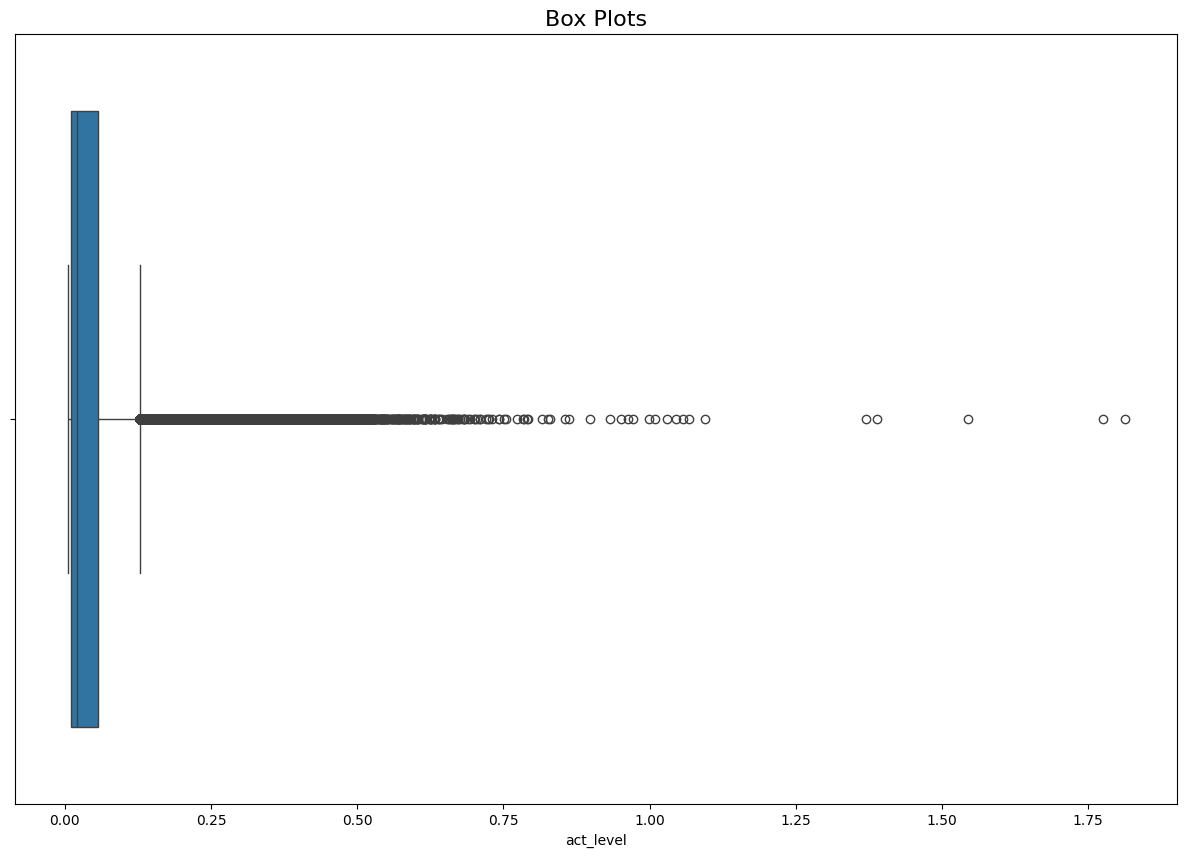

In [25]:
# ----------------------------------------------------------------- 
# FOCUSING ON POINT A. AND B.
# ----------------------------------------------------------------- 

# a. Does a value of 1.75 makes sense? Could it be that the patient was maybe just doing sport?
## Boxplot 
import seaborn as sns
import matplotlib.pyplot as plt
poll_box_activity = merged_inhale_openweather_dropped["act_level"]

plt.figure(figsize=(15, 10))
sns.boxplot(data=poll_box_activity, orient='h')
plt.title('Box Plots', fontsize=16)
plt.show()

## OUTPUT --> Based on the below plot, there are only a few values above 1.25 so I will drop them!
## Possibly an analysis of whether that's real as in if it's a recurring trend or not

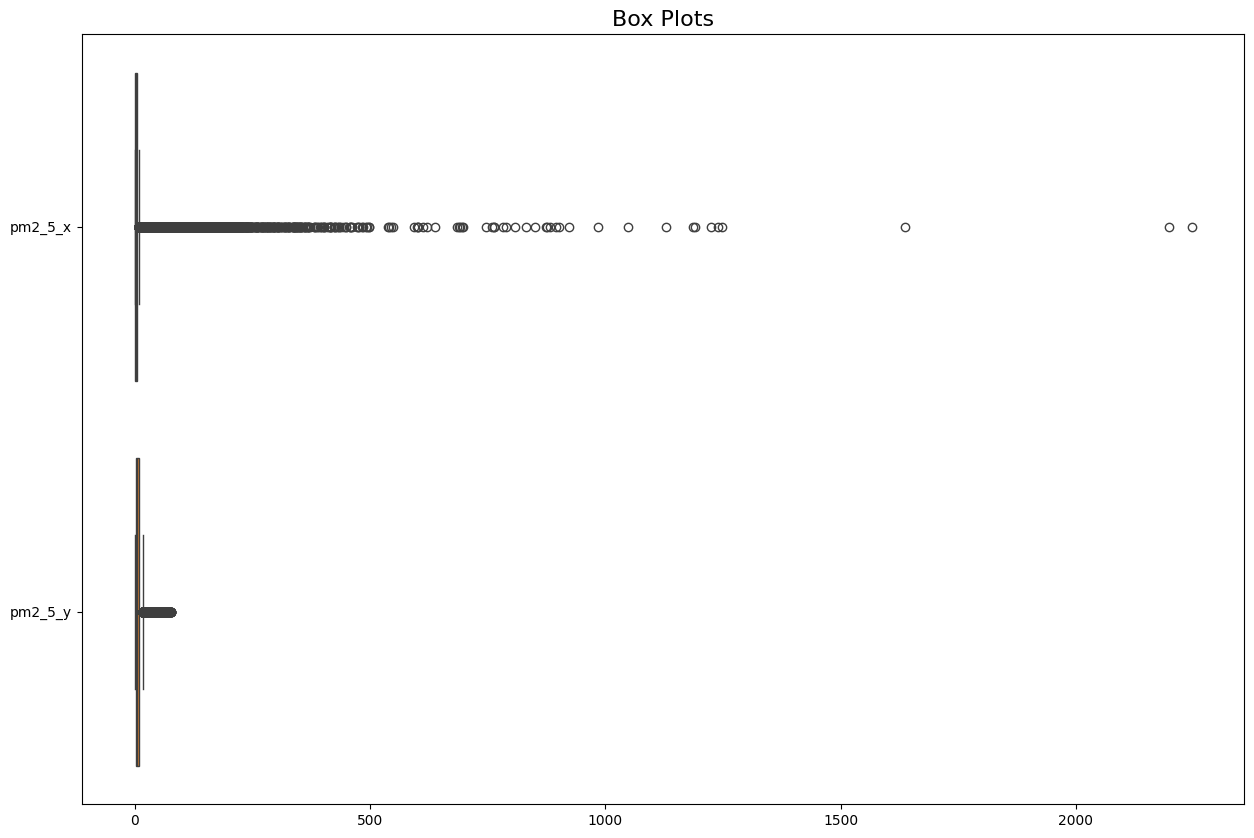

In [26]:
# ----------------------------------------------------------------- 
# FOCUSING ON POINT C.
# ----------------------------------------------------------------- 

# C. pm2_5 definitely has an outlier, this is because a max of 2245 would hurt or kill a person instantly.
## Boxplot 
import seaborn as sns
import matplotlib.pyplot as plt
columns_to_choose = ["pm2_5_x","pm2_5_y"]
poll_box_pm2_5 = merged_inhale_openweather_dropped[columns_to_choose].copy()

plt.figure(figsize=(15, 10))
sns.boxplot(data=poll_box_pm2_5, orient='h')
plt.title('Box Plots', fontsize=16)
plt.show()

## OUTPUT --> Based on the below plot, we can straight away see how pm2_5_x (which is air pollution coming from individual sensor_data)
## is more sensible to outliers. Values higher than 1000 need to be excluded since outliers.

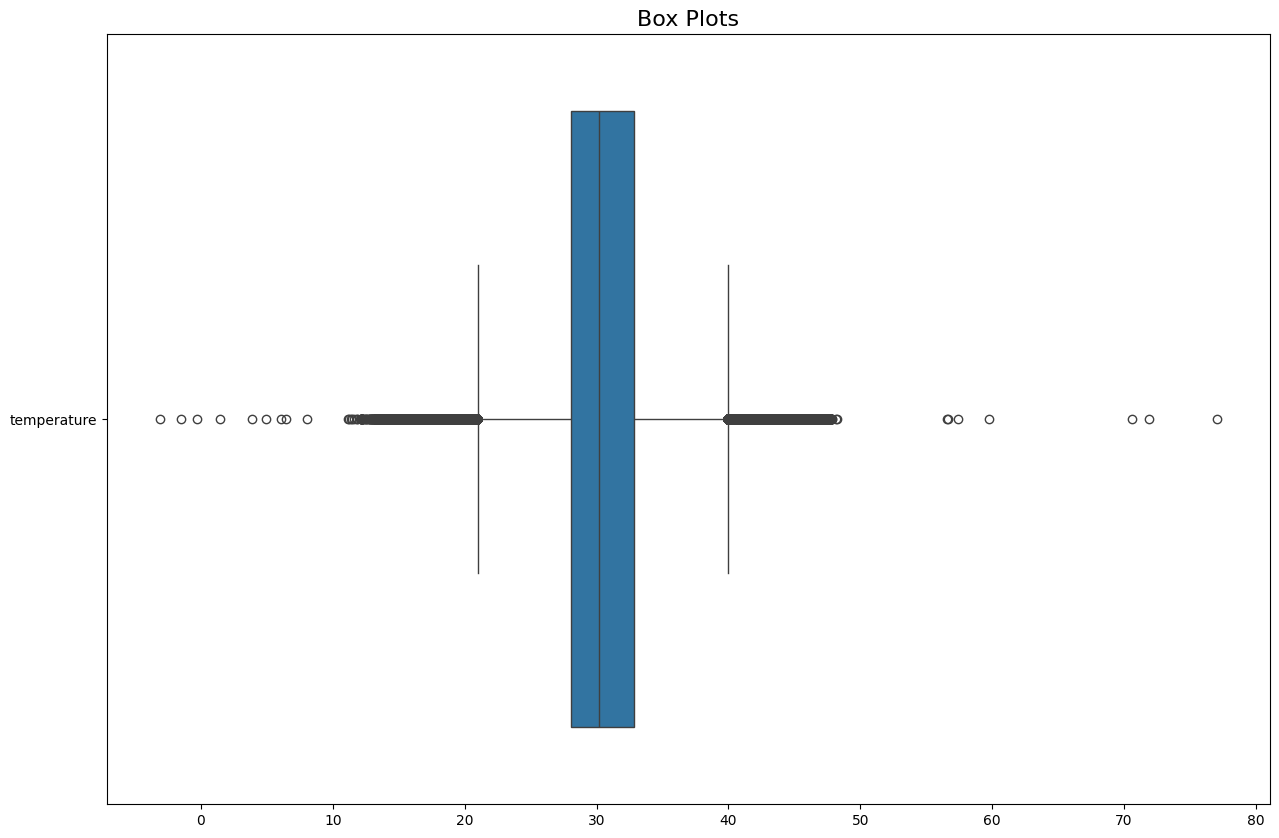

In [27]:
# ----------------------------------------------------------------- 
# FOCUSING ON POINT D.
# ----------------------------------------------------------------- 

# D. Temperature as well - since there is a massive spike
## Boxplot 
import seaborn as sns
import matplotlib.pyplot as plt
columns_to_choose = ["temperature"]
poll_box_temperature = merged_inhale_openweather_dropped[columns_to_choose].copy()

plt.figure(figsize=(15, 10))
sns.boxplot(data=poll_box_temperature, orient='h')
plt.title('Box Plots', fontsize=16)
plt.show()

## OUTPUT --> Because most of the sensors reading are in spring summer I was expecting values between 20 and 30 degrees.
## After checking the 56 degrees max value 

## After finding out the temperature of 56 degree was in March - I can confidently say it was an outlier!

merged_inhale_openweather_hot = merged_inhale_openweather_dropped[merged_inhale_openweather_dropped["temperature"] == 56.630000]

## OUTPUT --> Remove 56 degrees value!

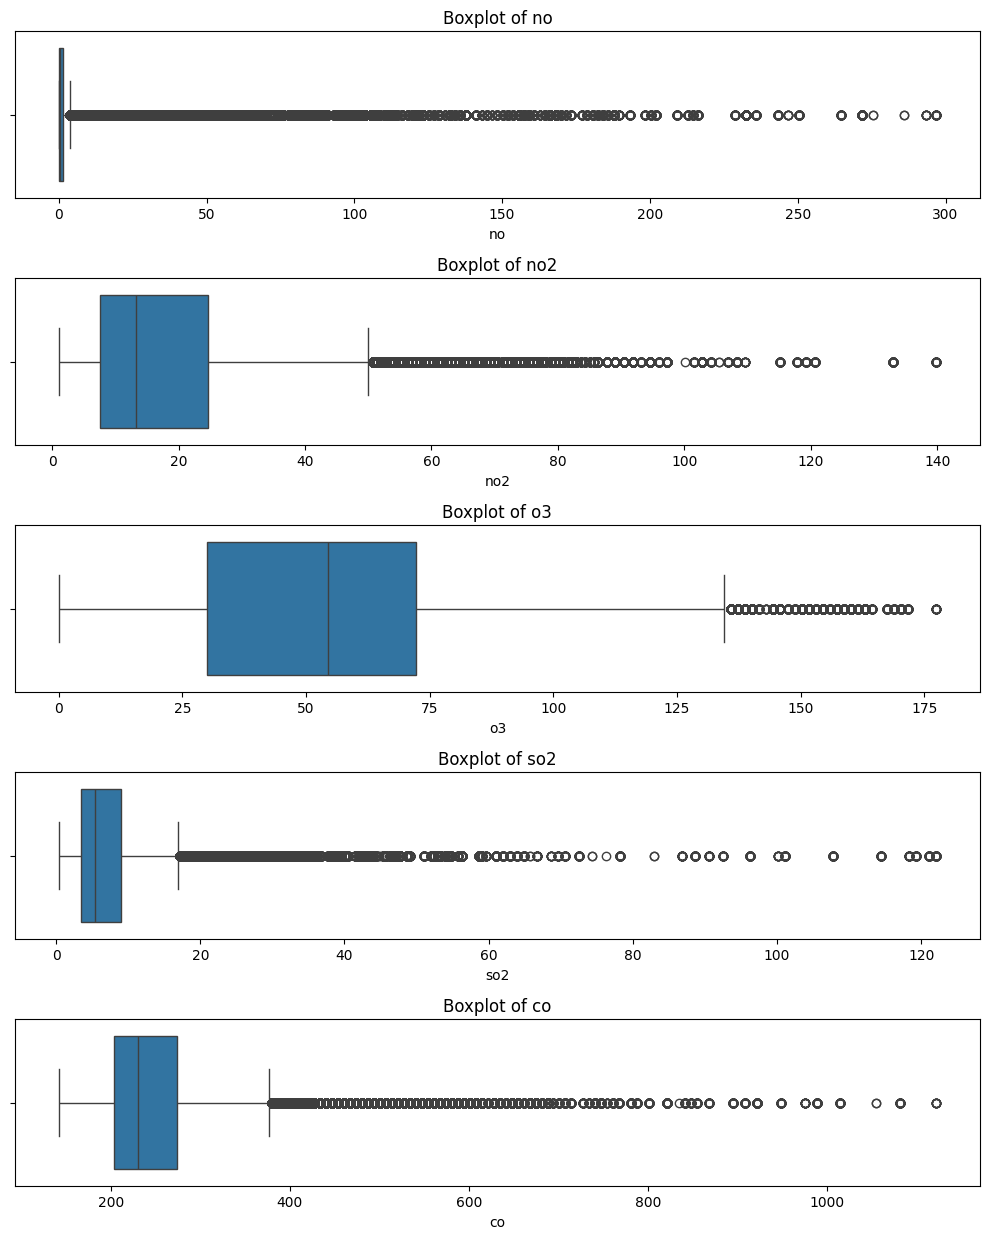

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# ----------------------------------------------------------------- 
# FOCUSING ON POINT E.
# ----------------------------------------------------------------- 

columns_to_choose = ["no", "no2", "o3", "so2", "co"]
poll_box_poll_overall = merged_inhale_openweather_dropped[columns_to_choose].copy()

n = len(columns_to_choose)
fig, axes = plt.subplots(n, 1, figsize=(10, 2.5 * n))  # 1 column, n rows

for i, col in enumerate(columns_to_choose):
    sns.boxplot(x=poll_box_poll_overall[col], ax=axes[i], orient='h')
    axes[i].set_title(f'Boxplot of {col}')
    axes[i].set_xlabel(col)

plt.tight_layout()
plt.show()


## OUTPUT --> For now I am removing only clear outliers!
## no < 250
## no2 < 130
## o3 < 135
## so2 < 120 
## co < 800

In [29]:
## Removing all outliers based on above findings
## A.B. ACTIVITY LEVELS: Only a few values above 1.25 so I will drop them!
## C. PM2_5 > 1000, drop
## D. TEMPERATURE: Remove 56 degress value!
## E. POLLUTION MEASURES FROM OPENWEATHER: But check if they are still there!

print(merged_inhale_openweather_dropped.columns)
print(f"Before outliers removal:{len(merged_inhale_openweather_dropped)}")

merged_inhale_openweather_act_no = merged_inhale_openweather_dropped[merged_inhale_openweather_dropped["act_level"] < 1.25]

merged_inhale_openweather_pm2_5_no = merged_inhale_openweather_act_no[merged_inhale_openweather_act_no["pm2_5_x"] < 1000]

merged_inhale_openweather_temp_no = merged_inhale_openweather_pm2_5_no[merged_inhale_openweather_pm2_5_no["temperature"] < merged_inhale_openweather_pm2_5_no["temperature"].max()]

merged_inhale_openweather_poll_tot = merged_inhale_openweather_temp_no[(merged_inhale_openweather_temp_no["no"] < 250) |
                                                                        (merged_inhale_openweather_temp_no["no2"] < 130) |
                                                                         (merged_inhale_openweather_temp_no["o3"] < 135) |
                                                                          (merged_inhale_openweather_temp_no["so2"] < 120) |
                                                                           (merged_inhale_openweather_temp_no["co"] < 800)]
        
## OUTPUT --> For now I am removing only clear outliers!
## no < 250
## no2 < 130
## o3 < 135
## so2 < 120 
## co < 800
print(f"After outliers removal:{len(merged_inhale_openweather_poll_tot)}")

Index(['patient_id', 'age', 'sex', 'timestamp', 'season_x', 'br_avg', 'br_std',
       'act_level', 'step_count', 'activity', 'latitude_x', 'longitude_x',
       'pm2_5_x', 'temperature', 'humidity', 'health', 'is_weekend', 'month',
       'week_of_year', 'hour_sin', 'hour_cos', 'dow_sin', 'dow_cos', 'season',
       'timestamp_hour', 'lat_round', 'lon_round', 'pm2_5_y', 'pm10', 'no',
       'no2', 'o3', 'so2', 'co'],
      dtype='object')
Before outliers removal:383027
After outliers removal:376445


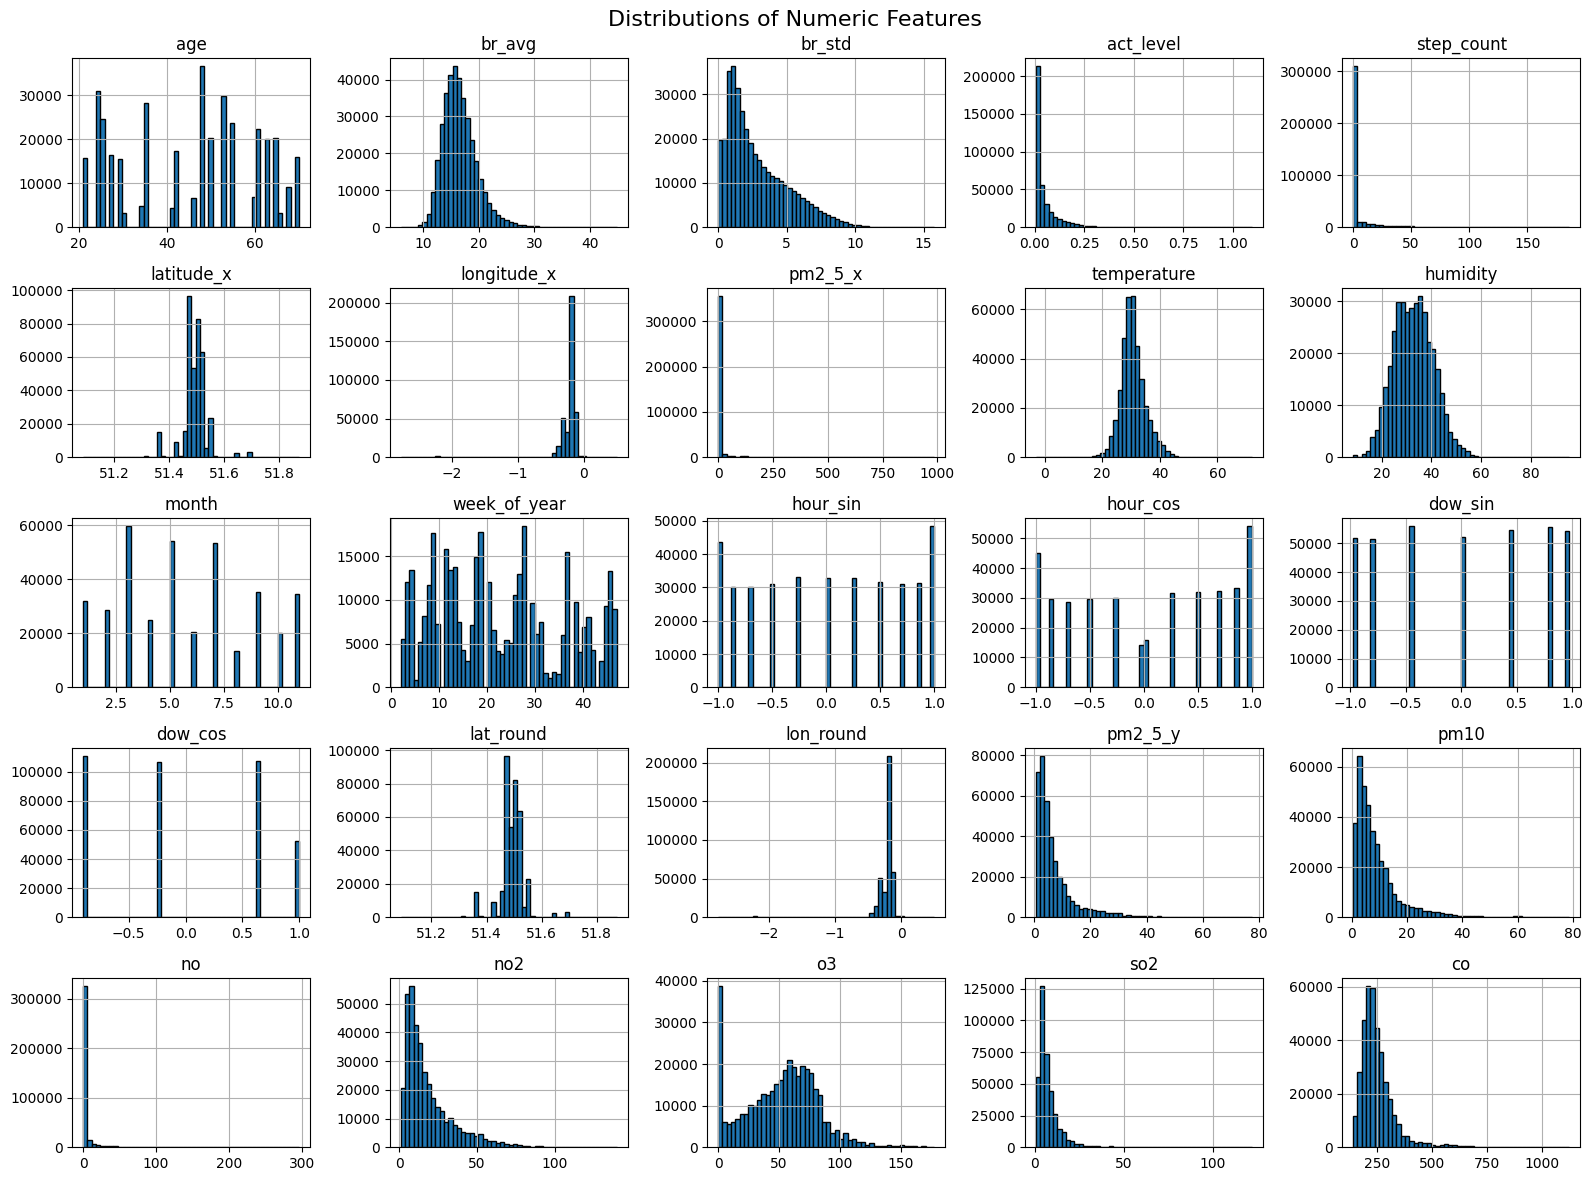

In [30]:
## When Looking at the distribution of variables we can see that:

import matplotlib.pyplot as plt
# Select only numeric columns
numeric_cols = merged_inhale_openweather_poll_tot.select_dtypes(include='number')
# Plot
numeric_cols.hist(bins=50, figsize=(16, 12), edgecolor='black')
plt.suptitle("Distributions of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()

## You can see straight away how:
# - br_avg --> Need log skew
# - br_std --> Need log skew
# - act_level --> Need log skew
# - step_count --> need log skew
# - temperature --> normalisation needed
# - humidity --> normalisation needed
# - pm_2_5_y, pm10, no, no2, o3, so2, co need log skew. 

## Data Preprocessing Pipeline:

In [31]:
categorical_cols = merged_inhale_openweather_poll_tot.select_dtypes(include=['object']).columns
numerical_cols = merged_inhale_openweather_poll_tot.select_dtypes(include=['float64', 'int64']).columns
print(f"Categorical columns need encoding are: {categorical_cols}")
print(f"Numerical columns need transformation are: {numerical_cols}")

Categorical columns need encoding are: Index(['patient_id', 'sex', 'season_x', 'activity', 'health', 'season'], dtype='object')
Numerical columns need transformation are: Index(['age', 'br_avg', 'br_std', 'act_level', 'step_count', 'latitude_x',
       'longitude_x', 'pm2_5_x', 'temperature', 'humidity', 'hour_sin',
       'hour_cos', 'dow_sin', 'dow_cos', 'lat_round', 'lon_round', 'pm2_5_y',
       'pm10', 'no', 'no2', 'o3', 'so2', 'co'],
      dtype='object')


In [32]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
import numpy as np
from sklearn.compose import ColumnTransformer

# Numeric transformer
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Categorical transformer
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Log transformer
def log_function(x):
    return np.log1p(x)

log_custom = FunctionTransformer(log_function, feature_names_out='one-to-one')

log_transformer = Pipeline([
    ('log_transform', log_custom)
])

log_transform_cols = ["br_avg", "br_std", "act_level", "step_count", "pm2_5_x", "pm2_5_y", "pm10",  "no",  "no2",  "o3",  "so2", "co"]


In [33]:
## Now puttin everything together in my pipeline!
preprocessor = ColumnTransformer(

transformers=[
        ('log', log_transformer, log_transform_cols),  # Log-transform specific columns
        ('num', numeric_transformer, numerical_cols.difference(log_transform_cols)),  # Other numerical columns
        ('cat', categorical_transformer, categorical_cols)  # Categorical columns
    ]
)

preprocessor

ColumnTransformer(transformers=[('log',
                                 Pipeline(steps=[('log_transform',
                                                  FunctionTransformer(feature_names_out='one-to-one',
                                                                      func=<function log_function at 0x7f8c87263670>))]),
                                 ['br_avg', 'br_std', 'act_level', 'step_count',
                                  'pm2_5_x', 'pm2_5_y', 'pm10', 'no', 'no2',
                                  'o3', 'so2', 'co']),
                                ('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', S...
                                 Index(['age', 'dow_cos', 'dow_sin', 'hour_cos', 'hour_sin', 'humidity',
       'lat_round', 'latitude_x', 'lon_round', 'longitude_x', 'temperature'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 Index(['patient_id', 'sex', 'season_x', 'activity', 'health', 'season'], dtype='object'))])

In [34]:
merged_inhale_openweather_transformed = preprocessor.fit_transform(merged_inhale_openweather_poll_tot)
columns = preprocessor.get_feature_names_out()
processed_merged_dataset = pd.DataFrame(merged_inhale_openweather_transformed, columns=columns)

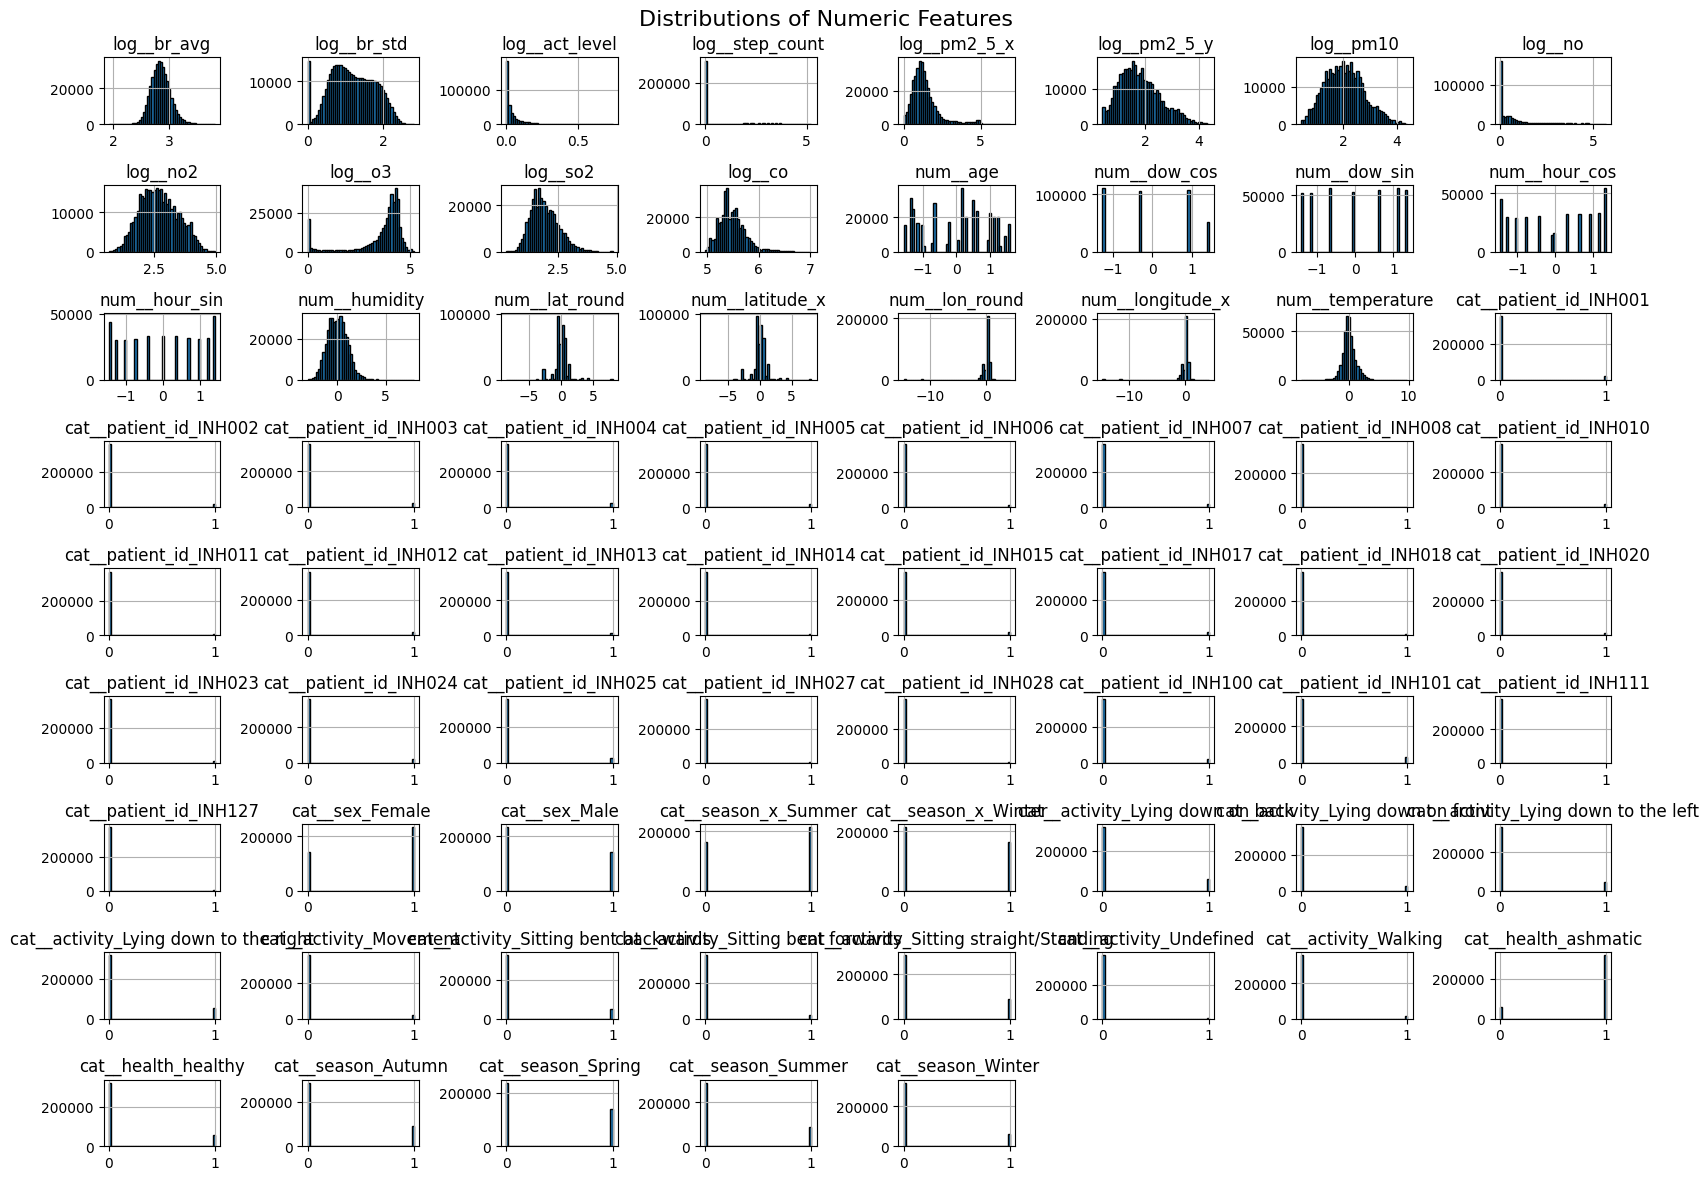

In [35]:
import matplotlib.pyplot as plt
# Select only numeric columns
numeric_cols = processed_merged_dataset.select_dtypes(include='number')
# Plot
numeric_cols.hist(bins=50, figsize=(16, 12), edgecolor='black')
plt.suptitle("Distributions of Numeric Features", fontsize=16)
plt.tight_layout()
plt.show()

In [36]:
clean_columns = [col.replace('log__', '').replace('cat__', '').replace('num__', '') for col in processed_merged_dataset.columns]
processed_merged_dataset.columns = clean_columns

processed_merged_dataset.to_csv("processed_merged_dataset.csv")

In [37]:
processed_merged_dataset.shape

(376445, 69)

In [38]:
processed_merged_dataset.columns

Index(['br_avg', 'br_std', 'act_level', 'step_count', 'pm2_5_x', 'pm2_5_y',
       'pm10', 'no', 'no2', 'o3', 'so2', 'co', 'age', 'dow_cos', 'dow_sin',
       'hour_cos', 'hour_sin', 'humidity', 'lat_round', 'latitude_x',
       'lon_round', 'longitude_x', 'temperature', 'patient_id_INH001',
       'patient_id_INH002', 'patient_id_INH003', 'patient_id_INH004',
       'patient_id_INH005', 'patient_id_INH006', 'patient_id_INH007',
       'patient_id_INH008', 'patient_id_INH010', 'patient_id_INH011',
       'patient_id_INH012', 'patient_id_INH013', 'patient_id_INH014',
       'patient_id_INH015', 'patient_id_INH017', 'patient_id_INH018',
       'patient_id_INH020', 'patient_id_INH023', 'patient_id_INH024',
       'patient_id_INH025', 'patient_id_INH027', 'patient_id_INH028',
       'patient_id_INH100', 'patient_id_INH101', 'patient_id_INH111',
       'patient_id_INH127', 'sex_Female', 'sex_Male', 'season_x_Summer',
       'season_x_Winter', 'activity_Lying down on back',
       'activity_

# APPENDIX

## RESPIRATORY DATA

In [39]:
# respiratory_data = read_file(file=files.iloc[9])
# respiratory_data.head(5)

In [40]:
# ## Let's check which columns are available
# respiratory_data.dtypes
# ## There are 57 different patient_id
# print(len(resp_data["patient_id"].unique()), resp_data.dtypes)

In [41]:
# respiratory_data = respiratory_data.drop(columns = ["Unnamed: 0"])

In [42]:
# import numpy as np
# import pandas as pd

# # Classifying each patient as 'ashmatic' or 'healthy' based on ID pattern
# respiratory_data["health"] = np.where(
#     respiratory_data["patient_id"].str[3] == "0", 
#     "ashmatic", 
#     "healthy"
# )

# # Ensuring 'timestamp' column is in datetime format
# respiratory_data['timestamp'] = pd.to_datetime(respiratory_data['timestamp'])

# # Extract time-based features
# respiratory_data['is_weekend'] = respiratory_data['timestamp'].dt.dayofweek.isin([5, 6])
# respiratory_data['month'] = respiratory_data['timestamp'].dt.month
# respiratory_data['week_of_year'] = respiratory_data['timestamp'].dt.isocalendar().week

# # Cyclical encoding for hour of day and day of week this is because if not the model will see 23pm and 1am as far away 
# respiratory_data['hour_sin'] = np.sin(2 * np.pi * respiratory_data['timestamp'].dt.hour / 24)
# respiratory_data['hour_cos'] = np.cos(2 * np.pi * respiratory_data['timestamp'].dt.hour / 24)

# # Cyclical encoding for day of week
# respiratory_data['dow_sin'] = np.sin(2 * np.pi * respiratory_data['timestamp'].dt.dayofweek / 7)
# respiratory_data['dow_cos'] = np.cos(2 * np.pi * respiratory_data['timestamp'].dt.dayofweek / 7)

# respiratory_data = respiratory_data.drop(columns=["timestamp"])

# # Now your respiratory_data has clean, ML-friendly time embeddings
# respiratory_data.head()

In [43]:
# respiratory_data["sex"].value_counts()

In [44]:
# ## I need to understand the timeline per id
# timeline_per_id = (
#     resp_data
#     .groupby("patient_id")["timestamp"]
#     .agg(["min", "max"])
#     .reset_index()
# ).copy()
# print(timeline_per_id)

## Timestamp
## Every id has different timestamp - how is this going to impact my model?


In [45]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import pandas as pd

# # Filter data for specific patient
# patient_id = "INH029"
# measure = "br_avg"
# resp_data_patient = resp_data[resp_data["patient_id"] == patient_id].copy()

# # # Ensure timestamp is in datetime format (if not already)
# resp_data_patient['timestamp'] = pd.to_datetime(resp_data_patient['timestamp'])
# # pd.to_datetime(resp_data001['timestamp'])

# # Set timestamp as index (for clean plotting)
# resp_data_patient.set_index('timestamp', inplace=True)

# # Create the plot with proper timestamp handling
# plt.figure(figsize=(15, 6))
# resp_data_patient[measure].plot(title=f'{measure}  Over Time for Patient {patient_id}')

# # Customize x-axis to show timestamps clearly
# plt.xlabel('Timestamp')  # Explicit x-label
# plt.ylabel(measure)
# plt.grid(True)

# # Improve x-axis tick formatting for better readability
# plt.gcf().autofmt_xdate()  # Auto-format dates to prevent overlap

# plt.tight_layout()
# plt.show()

# Participants
## a. How many participants do we have?
## b. Males vs Females?
## c. What about their age?
## d. Wich activity do they do?
## e. Which features are more or less correlated?

In [46]:
# ## a. How many participants do we have?
# print(len(resp_data["patient_id"].unique()))

# ## b. I am dropping duplicates because it's a time-series dataset
# ## There are more females than males - is this going to imbalance the dataset - does it matter?
# gender_counts = resp_data.drop_duplicates(subset="patient_id")["sex"].value_counts()
# print(gender_counts)

# ## c. In relation to their age - there are slightly more individuals between the age of 35 and 50 
# ## then other age brackets
# import matplotlib.pyplot as plt

# # Get unique ages per patient_id
# unique_ages = resp_data.drop_duplicates(subset="patient_id")["age"]

# # Plot histogram
# plt.figure(figsize=(10, 6))
# plt.hist(unique_ages, bins=10, edgecolor='black', color='skyblue')
# plt.title("Age Distribution of Participants (One per ID)")
# plt.xlabel("Age")
# plt.ylabel("Count")
# plt.grid(axis='y', alpha=0.5)
# plt.show()

# ## d. What are the activity types?
# activity_counts = resp_data.drop_duplicates(subset="patient_id")["activity"].value_counts()
# print(activity_counts)

In [47]:
# ## e. Which features are more or less correlated?
# ## It seems like that only activity levels are strongly correlated
# # Correct way to drop multiple columns
# import pandas as pd

# # Convert categorical columns to numerical (one-hot encoding)
# resp_data_encoded = pd.get_dummies(
#     resp_data,
#     columns=["sex", "activity", "season"],  # Replace with your column names
#     drop_first=True  # Avoid multicollinearity (e.g., Female=0 → Male=1)
# )

# # Now drop other non-numeric columns (e.g., patient_id, timestamp)
# resp_data_corr = resp_data_encoded.drop(columns=["Unnamed: 0", "patient_id", "timestamp"])

# # Compute correlation
# corr = resp_data_corr.corr()
# plt.figure(figsize=(12, 8))
# sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0, linewidths=0.5)
# plt.title("Feature Correlation Matrix")
# plt.show()

# POLLUTION DATA
## a. How many participants do we have? For how long?
## b. Where is the data located by participant
## c. Which features are more or less correlated?
## d. Generic trend of pollution vs location  
## e. Pollution and season
## f  Pollution vs time of day
## g. Pollution vs temperature and humifity

In [48]:
# pollution_data = read_file(file=files.iloc[8])
# pollution_data.head(5)

In [49]:
# print(pollution_data["season"].value_counts())
# print(pollution_data["patient_id"].unique().copy())
# ## a. How many participants do we have?
# print(len(pollution_data["patient_id"].unique()))

In [50]:
# import seaborn as sns
# import matplotlib.pyplot as plt
# poll_box = pollution_data.drop(columns=["Unnamed: 0"])
# poll_box = poll_box[poll_box["patient_id"] == "INH002"]
# plt.figure(figsize=(15, 10))
# sns.boxplot(data=poll_box, orient='h')
# plt.title('Box Plots', fontsize=16)
# plt.show()

In [51]:
# ## Testing
# bad_reading = pollution_data.groupby('patient_id')['pm2_5'].agg(['max','count']).sort_values('max', ascending=False)
# bad_reading


In [52]:
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.colors import BoundaryNorm

# pollution_data = pollution_data[pollution_data["pm2_5"] < 501]
# # 1) Define your PM₂.₅ bins at real‐world breakpoints
# bins = [0,10, 25, 50, 100, 200, 500]

# # 2) Create a norm that maps each bin to a distinct color
# norm = BoundaryNorm(bins, ncolors=256, clip=True)

# # 3) Clip your data to the top end
# x = pollution_data.longitude
# y = pollution_data.latitude
# c = pollution_data.pm2_5.clip(upper=500)

# # 4) Plot with 'turbo' (or swap to 'cividis', 'viridis', etc.)
# plt.figure(figsize=(10,8))
# sc = plt.scatter(
#     x, y,
#     c=c,
#     cmap='turbo',
#     norm=norm,
#     s=25,          # slightly bigger points
#     edgecolors='k',# thin black border for contrast
#     linewidths=0.2,
#     alpha=0.9
# )

# # 5) Colorbar ticks at exactly your bin edges
# cb = plt.colorbar(sc, boundaries=bins, ticks=bins)
# cb.set_label('PM₂.₅ (µg/m³), binned')

# plt.xlabel('Longitude')
# plt.ylabel('Latitude')
# plt.title('PM₂.₅ by Latitude-Longitude London spotlight')
# plt.grid(True, linestyle='--', linewidth=0.5)
# plt.savefig("London_pollution.jpeg") 
# plt.show()

In [53]:
# ## PM2.5 by time of day?
# import pandas as pd
# import matplotlib.pyplot as plt

# ## Time between 6pm to 8pm is the one with the highest exposure to air pollution!

# # 1) Make sure your timestamp is a proper datetime
# pollution_data['timestamp'] = pd.to_datetime(pollution_data['timestamp'])

# # 2) Extract hour of day
# pollution_data['hour'] = pollution_data['timestamp'].dt.hour

# # 3) Compute the mean (and maybe the ±1 σ envelope) by hour
# hourly = pollution_data.groupby('hour')['pm2_5'].agg(['mean','std','count']).reset_index()

# # 4) Plot
# plt.figure(figsize=(10,5))
# plt.plot(hourly['hour'], hourly['mean'], marker='o', lw=2, label='Mean PM₂.₅')
# # plt.fill_between(hourly['hour'],
# #                  hourly['mean'] - hourly['std'],
# #                  hourly['mean'] + hourly['std'],
# #                  color='C0', alpha=0.2,
# #                  label='±1 σ')
# plt.xticks(range(0,24))
# plt.xlabel('Hour of Day')
# plt.ylabel('PM₂.₅ (µg/m³)')
# plt.title('Average Daily Cycle of PM₂.₅')
# plt.grid(True, ls='--', alpha=0.5)
# plt.legend()
# plt.savefig("PM₂.₅ average daily cycle.jpeg") 
# plt.show()


In [54]:
# ## How about Pm2.5 by season

# ## Higher in the winter as expected 

# # compute count, mean, std, min, max by season
# print(pollution_data.groupby("season")["pm2_5"]
#       .describe()[["count","mean","std","min","max"]])


In [55]:
# ## In term of feature correlation
# ## c. not much to say about it but maybe a light correlation between temperature and humidity?
# import pandas as pd

# # # Convert categorical columns to numerical (one-hot encoding)
# poll_data_encoded = pd.get_dummies(
#     pollution_data,
#     columns=["season"]
# )
# # Now drop other non-numeric columns (e.g., patient_id, timestamp)

# pollution_data.head()

# poll_data_corr = poll_data_encoded.drop(columns=["Unnamed: 0", "patient_id", "timestamp"])

# # Compute correlation
# corr = poll_data_corr.corr()
# plt.figure(figsize=(12, 8))
# sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
# plt.title("Feature Correlation Matrix")
# plt.show() 


# Data Prepocessing:
## a. Outliers removal 
## b. Dropping nans 
## c. Standardisation but wait and do altogether

# RESPIRATORY DATA

In [56]:
# ## Checking whether there are any outliers!
# ## The problem with this approach is that in healthcare applications outliers are very important to maintain
# ## This is because they normally tell a story about some peculiarity
# ## The only ones that I want to remove are due to calibration
# # Maybe something on step_count?

# import seaborn as sns
# box_resp_data = resp_data.drop(columns=["Unnamed: 0"]).copy()
# plt.figure(figsize=(15, 10))
# sns.boxplot(data=box_resp_data, orient='h')
# plt.title('Box Plots', fontsize=16)
# plt.show()

In [57]:
# ## Let's checl how many nans
# print(resp_data.isnull().sum() / len(resp_data) * 100)

## POLLUTION DATA

In [58]:
# ## From the box plot below - there are some obious outliers in pm2.5

# import seaborn as sns
# box_poll_data = pollution_data.drop(columns=["Unnamed: 0"]).copy()
# plt.figure(figsize=(15, 10))
# sns.boxplot(data=box_poll_data, orient='h')
# plt.title('Box Plots', fontsize=16)
# plt.show()

In [59]:
# ## Let's checl how many nans
# print(pollution_data.isnull().sum() / len(pollution_data) * 100)

In [60]:
# ## Let's try a feature correlation!
# # Convert categorical columns to numerical (one-hot encoding)
# merged_data_encoded = pd.get_dummies(
#     merged_data,
#     columns=["season", "activity", "sex"],  # Replace with your column names
#     drop_first=True  
# )
# # Now drop other non-numeric columns (e.g., patient_id, timestamp)
# merged_data_corr = merged_data_encoded.drop(columns=["Unnamed: 0_x", "patient_id", "timestamp", "Unnamed: 0_y"])

# # Compute correlation
# corr = merged_data_corr.corr()
# plt.figure(figsize=(12, 8))
# sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0, linewidths=0.5)
# plt.title("Feature Correlation Matrix")
# plt.show() 


APPENDIX

<h2 style="color:#0074D9;">4. List the fields (clinical variables) of a study.</h2>

In [61]:
# from pydmp import list_fields
# fields = list_fields(study_id=study_id, format='df')
# fields

<h2 style="color:#0074D9;">5. Fetch the data of fields of a study.</h2>

In [62]:
# from pydmp import list_data
# data = list_data(study_id=study_id, field_ids=['File_Study_File'], format='df')
# data

<h2 style="color:#0074D9;">6. Run your own analysis.</h2>

In [63]:
## Focus resp_data.csv